Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression
import statsmodels.api as sm
import warnings
from sklearn.metrics import f1_score,roc_curve
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from pylab import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


%matplotlib inline

C:\Users\kahma\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Read Data

In [2]:
data = pd.read_csv('C:\\Users\\kahma\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


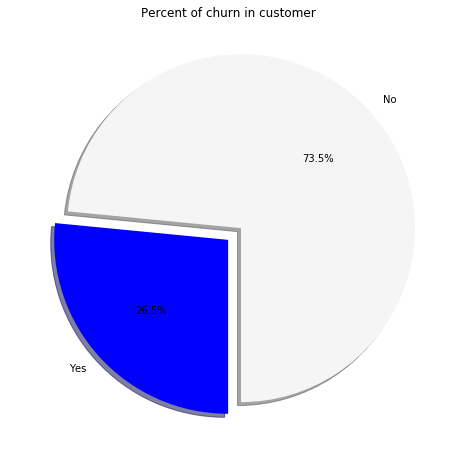

In [4]:
labels =data['Churn'].value_counts(sort = True).index
sizes = data['Churn'].value_counts(sort = True)


colors = ["whitesmoke","blue"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

In [5]:
data['Churn'] = data['Churn'].map(lambda s :1  if s =='Yes' else 0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(3), obje

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Checking missing values

In [8]:
missing_data = data.isnull().sum(axis=0).reset_index()

In [9]:
missing_data.columns = ['column_name', 'missing_count']

In [10]:
missing_data

,column_name,missing_count
0,customerID,0
1,gender,0
2,SeniorCitizen,0
3,Partner,0
4,Dependents,0
5,tenure,0
6,PhoneService,0
7,MultipleLines,0
8,InternetService,0
9,OnlineSecurity,0


Correlation

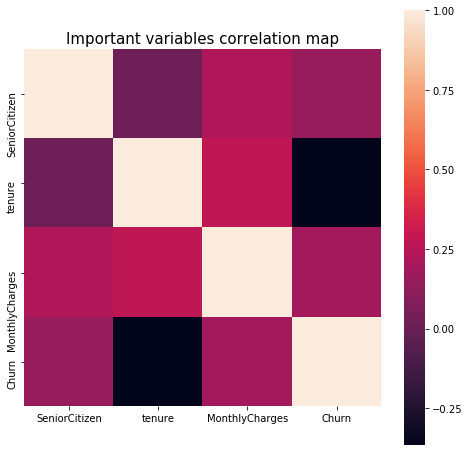

In [11]:

corrmat = data.corr(method='spearman')

f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

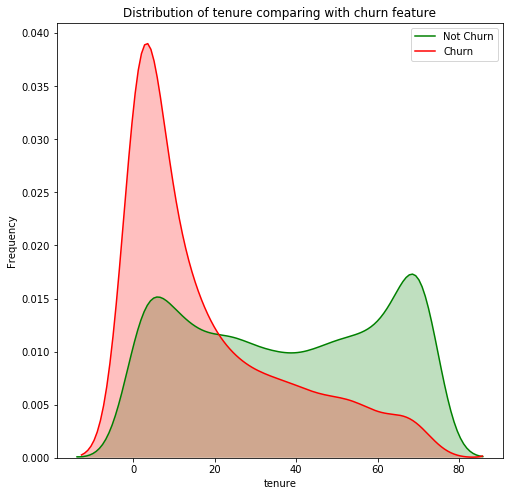

In [12]:
# tenure distibution 
g = sns.kdeplot(data.tenure[(data["Churn"] == 0) ], color="green", shade = True)
g = sns.kdeplot(data.tenure[(data["Churn"] == 1) ], ax =g, color="red", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

Changing columns with values as ['Yes','No'] to ['0','1']

In [71]:
data['Partner'] = data['Partner'].map(lambda s :1  if s =='Yes' else 0)
data['Partner'].value_counts()
data['Dependents'] = data['Dependents'].map(lambda s :1  if s =='Yes' else 0)
data['PhoneService'] = data['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)
data['MultipleLines'].replace('No phone service','No', inplace=True)
data['MultipleLines'] = data['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
data['MultipleLines'].value_counts()
data['Has_InternetService'] = data['InternetService'].map(lambda s :0  if s =='No' else 1)
data['Fiber_optic'] = data['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
data['DSL'] = data['InternetService'].map(lambda s :1  if s =='DSL' else 0)
data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
data['DeviceProtection'] = data['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
data['TechSupport'] = data['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingTV'] = data['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingMovies'] = data['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)
data['gender'] = data['gender'].map(lambda s :1  if s =='Yes' else 0)

In [74]:
print(data['Has_InternetService'].value_counts())
print(data['Fiber_optic'].value_counts())
print(data['DSL'].value_counts())
data.drop(['InternetService'], axis=1, inplace=True)

1    5517
0    1526
Name: Has_InternetService, dtype: int64
0    3947
1    3096
Name: Fiber_optic, dtype: int64
0    4622
1    2421
Name: DSL, dtype: int64


In [76]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [77]:
data = pd.get_dummies(data=data, columns=['PaymentMethod'])

In [78]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Has_InternetService,Fiber_optic,DSL,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,29.85,0,1,0,1,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,56.95,1889.5,0,1,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,53.85,108.15,1,1,0,1,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,42.30,1840.75,0,1,0,1,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,1,1,0,0,0,1,0
5,9305-CDSKC,0,0,0,0,8,1,1,0,0,...,99.65,820.5,1,1,1,0,0,0,1,0
6,1452-KIOVK,0,0,0,1,22,1,1,0,1,...,89.10,1949.4,0,1,1,0,0,1,0,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,0,...,29.75,301.9,0,1,0,1,0,0,0,1
8,7892-POOKP,0,0,1,0,28,1,1,0,0,...,104.80,3046.05,1,1,1,0,0,0,1,0
9,6388-TABGU,0,0,0,1,62,1,0,1,1,...,56.15,3487.95,0,1,0,1,1,0,0,0


In [79]:
data[['PaymentMethod_Electronic check',
      'PaymentMethod_Mailed check',
      'PaymentMethod_Bank transfer (automatic)',
      'PaymentMethod_Credit card (automatic)']].head()

,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0


In [80]:
data = pd.get_dummies(data=data, columns=['Contract'])

In [81]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Has_InternetService,Fiber_optic,DSL,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,1,0,1,0,0,0,1,1,0,0
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,1,0,1,1,0,0,0,0,1,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,1,1,0,0,0,1,0,1,0,0
5,9305-CDSKC,0,0,0,0,8,1,1,0,0,...,1,1,0,0,0,1,0,1,0,0
6,1452-KIOVK,0,0,0,1,22,1,1,0,1,...,1,1,0,0,1,0,0,1,0,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
8,7892-POOKP,0,0,1,0,28,1,1,0,0,...,1,1,0,0,0,1,0,1,0,0
9,6388-TABGU,0,0,0,1,62,1,0,1,1,...,1,0,1,1,0,0,0,0,1,0


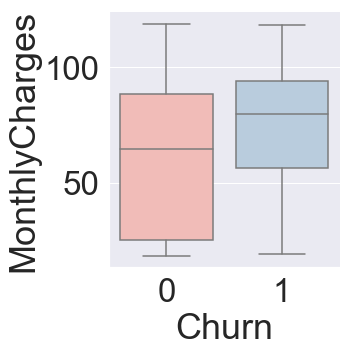

In [82]:
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = data, kind="box", palette = "Pastel1")

In [83]:
data['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [84]:
## because 11 rows contain " " , it means 11 missing data in our dataset
len(data[data['TotalCharges'] == " "])

11

In [85]:
## Drop missing data
data = data[data['TotalCharges'] != " "]

In [86]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [88]:
data.drop(['customerID'], axis=1, inplace=True)

In [89]:
data["Churn"] = data["Churn"].astype(int)

Y_train = data["Churn"]
X_train = data.drop(labels = ["Churn"],axis = 1)

Random Forest

In [90]:
Rfclf = RandomForestClassifier(random_state=15)
Rfclf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [91]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(Rfclf, X_train, Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.78835227 0.79119318 0.77840909 0.77382646 0.77524893 0.74679943
 0.77951636 0.78236131 0.78520626 0.78917379]


0.7790087082850241

My default random forest get around 78% accuracy from cross-validation

In [92]:
%%time
param_grid  = { 
                'n_estimators' : [500,1200],
               # 'min_samples_split': [2,5,10,15,100],
               # 'min_samples_leaf': [1,2,5,10],
                'max_depth': range(1,5,2),
                'max_features' : ('log2', 'sqrt'),
                'class_weight':[{1: w} for w in [1,1.5]]
              }

GridRF = GridSearchCV(RandomForestClassifier(random_state=15), param_grid)

GridRF.fit(X_train, Y_train)
#RF_preds = GridRF.predict_proba(X_test)[:, 1]
#RF_performance = roc_auc_score(Y_test, RF_preds)

print(
    #'DecisionTree: Area under the ROC curve = {}'.format(RF_performance)
     "\nBest parameters \n" + str(GridRF.best_params_))


Best parameters 
{'class_weight': {1: 1.5}, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 500}
Wall time: 3min 2s


In [93]:
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 1.5},
            criterion='gini', max_depth=3, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=15,
            verbose=0, warm_start=False)

In [94]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(rf, X_train, Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.80255682 0.81392045 0.80255682 0.81650071 0.78093883 0.78805121
 0.80369844 0.79516358 0.78947368 0.79344729]


0.798630784239337

My grid-search random forest get around 80% accuracy from cross-validation, a little bit improve from default parameter

In [95]:
# Split data into x and y
y = data[["Churn"]]
x = data.drop("Churn", axis=1)

# Create test and training sets
x_train, x_test, y_train, y_test = train_test_split(x,
    y, test_size= .2, random_state= 1)

XGBoost Algorithm

Accuracy: 81.81%


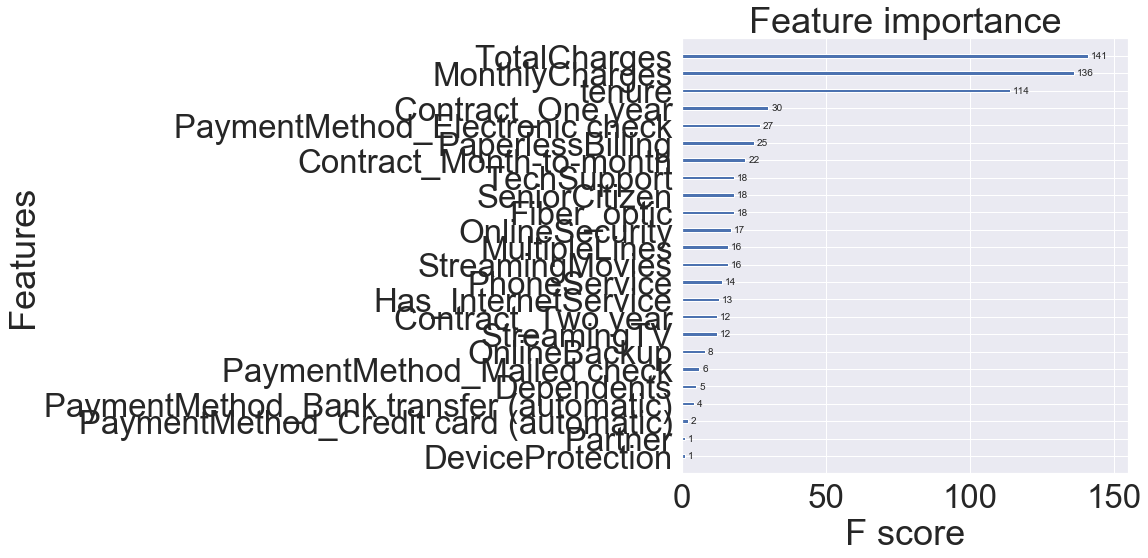

In [96]:
# Build XGBoost model
model = XGBClassifier()
model.fit(X_train, Y_train)


# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# Find Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Display feature importance
plot_importance(model)

In [97]:
#create function for validation and return accuracy and roc-auc score
def evaluate_model(model):
    model.fit(X_train,Y_train)
    prediction_test = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    rocauc = metrics.roc_auc_score(y_test, prediction_test)
    return accuracy,rocauc,prediction_test

In [99]:
# Running logistic regression model

lr = LogisticRegression(C=0.1)
acc,rocauc,testpred_lr  = evaluate_model(lr)
print('Logistic Regression...')
print('Accuracy score :',acc)
print('ROC-AUC score :',rocauc)

Logistic Regression...
Accuracy score : 0.7953091684434968
ROC-AUC score : 0.7066542259177021


In [100]:
rf =RandomForestClassifier()
rf.fit(X_train,Y_train)
acc,rocauc,testpred_rf  = evaluate_model(rf)
print('Random Forest...')
print('Accuracy score :',acc)
print('ROC-AUC score :',rocauc)

Random Forest...
Accuracy score : 0.9829424307036247
ROC-AUC score : 0.9716421788633249


In [101]:
#set up search grid
#Number of search trees
n_estimators=range(50,100)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = range(4,8)
# Minimum number of samples required to split a node
min_samples_split = range(2,6)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,5)
# Method of selecting samples for training each tree
bootstrap = [True, False]
#criterion
criterion=['gini','entropy']
#create the random grid
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap,
              'criterion':criterion}
print(random_grid)

{'n_estimators': range(50, 100), 'max_features': ['auto', 'sqrt'], 'max_depth': range(4, 8), 'min_samples_split': range(2, 6), 'min_samples_leaf': range(1, 5), 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [102]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=2018)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, n_iter=100,random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   45.0s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': range(50, 100), 'max_features': ['auto', 'sqrt'], 'max_depth': range(4, 8), 'min_samples_split': range(2, 6), 'min_samples_leaf': range(1, 5), 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [103]:
#best params
params = rf_random.best_params_
params

{'n_estimators': 63,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 7,
 'criterion': 'entropy',
 'bootstrap': True}

In [48]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, Y_train)

Y_pred = logistic_model.predict(x_test)

logistic_model.score(X_train, Y_train)

0.8048919226393629

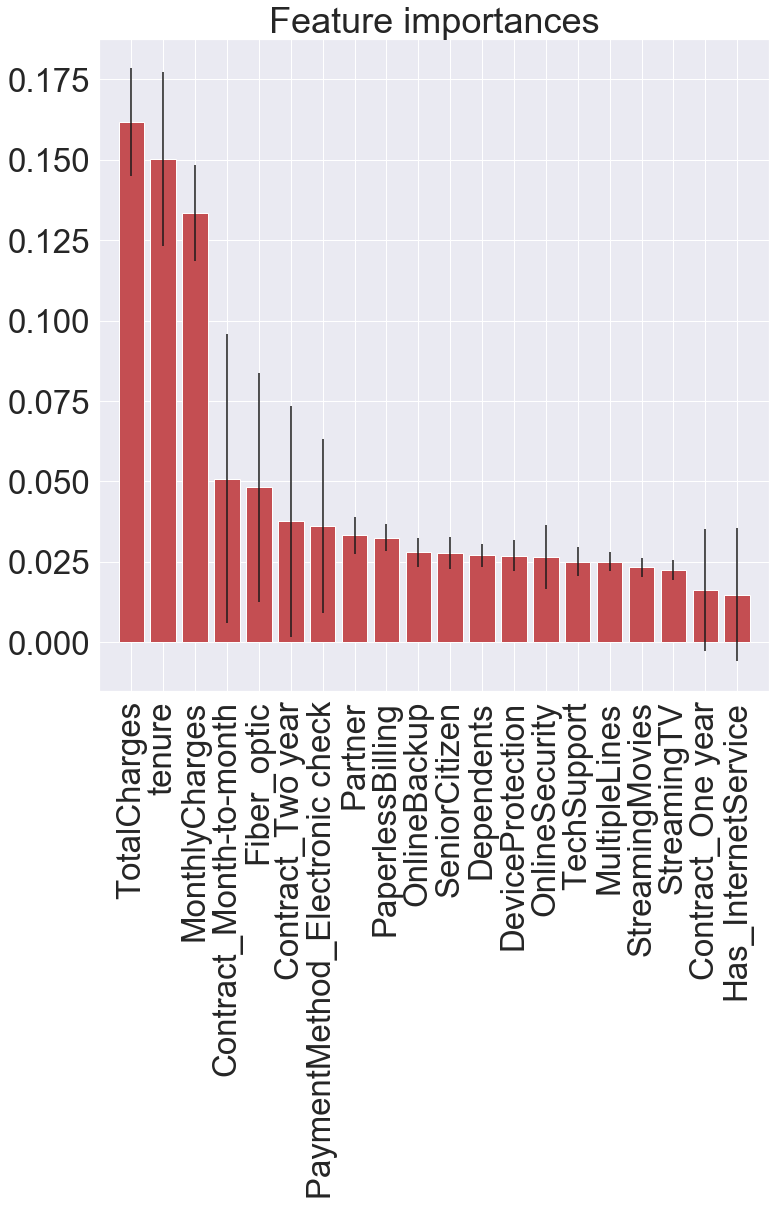

In [104]:
feat_names = X_train.columns
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(X_train, Y_train)

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

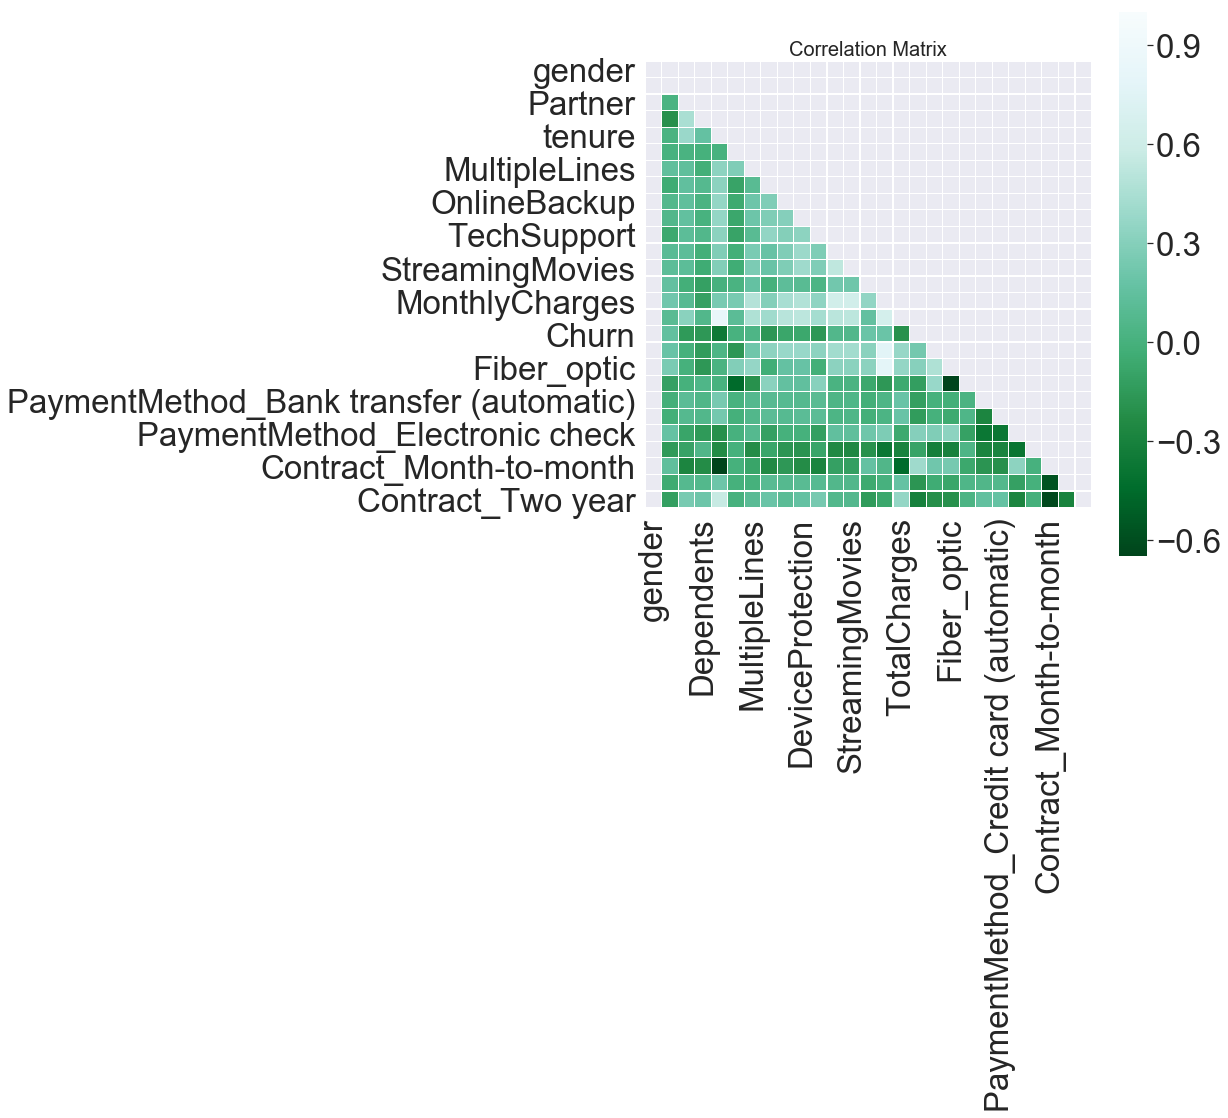

In [105]:
mask = np.zeros_like(data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(10,10))
plt.title('Correlation Matrix',fontsize=20)
sns.set(font_scale=3)
sns.heatmap(data.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="BuGn_r",mask=mask,linecolor='w',cbar={"shrink":.75})

In [154]:
reg_data = pd.read_csv('C:\\Users\\kahma\\Downloads\\bike-sharing-dataset\\Bike-Sharing-Dataset\\hour.csv')

In [139]:
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

X = pd.DataFrame.copy(reg_data)
dummy_columns = ["season", "yr", "mnth", "hr", "weekday", "weathersit"]
for dummy_column in dummy_columns:
    X = generate_dummies(X, dummy_column)

In [140]:
for dummy_column in dummy_columns:
    del X[dummy_column]

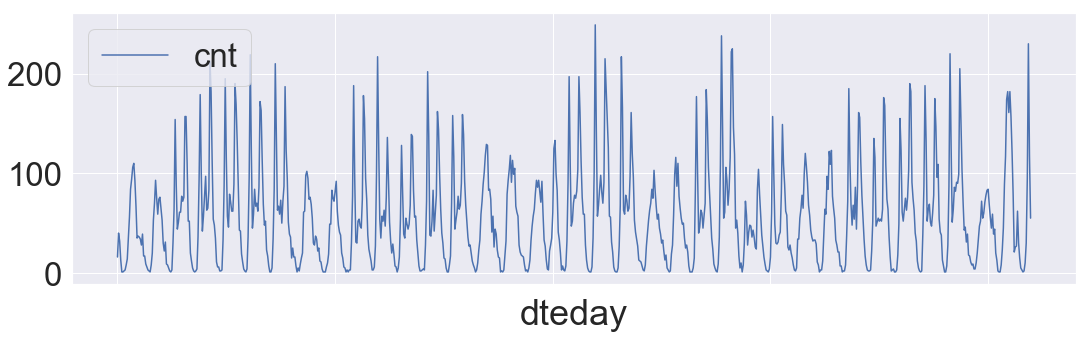

In [141]:
first_5_weeks = 5*7*24 # 3 weeks (7 days), 24 hours each day
X[:first_5_weeks].plot(x='dteday', y='cnt', figsize=(18, 5))

In [155]:
## We use 'cnt' as the response variable. We drop 'casual' and 'registered'

y = reg_data['cnt']
del reg_data['cnt']
del reg_data['casual']
del reg_data['registered']

In [156]:
## drop also the variables 'instant' and 'dteday' since they are irrelevant

del reg_data['instant']
del reg_data['dteday']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(reg_data, y, random_state = 22, test_size = 0.2)

In [158]:
# Grid Search
regressor = RandomForestRegressor()
parameters = [{'n_estimators' : [150,200,250,300], 'max_features' : ['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


In [159]:
best_parameters

{'max_features': 'auto', 'n_estimators': 250}

In [160]:
# Random Forest Regression model
# Use the best parameters found from above to build the model

regressor = RandomForestRegressor(n_estimators = 300, max_features = 'auto') 
regressor.fit(X_train,y_train)

# Predicting the values 

y_pred = regressor.predict(X_test)

In [161]:
# Comparing predicted values with true values in testing set
mean_absolute_error(y_test, y_pred)

25.52038359864467

In [162]:
# Using k-fold cross validation to evaluate the performance of the model
accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =10)
accuracy.mean()

0.9435039680710041

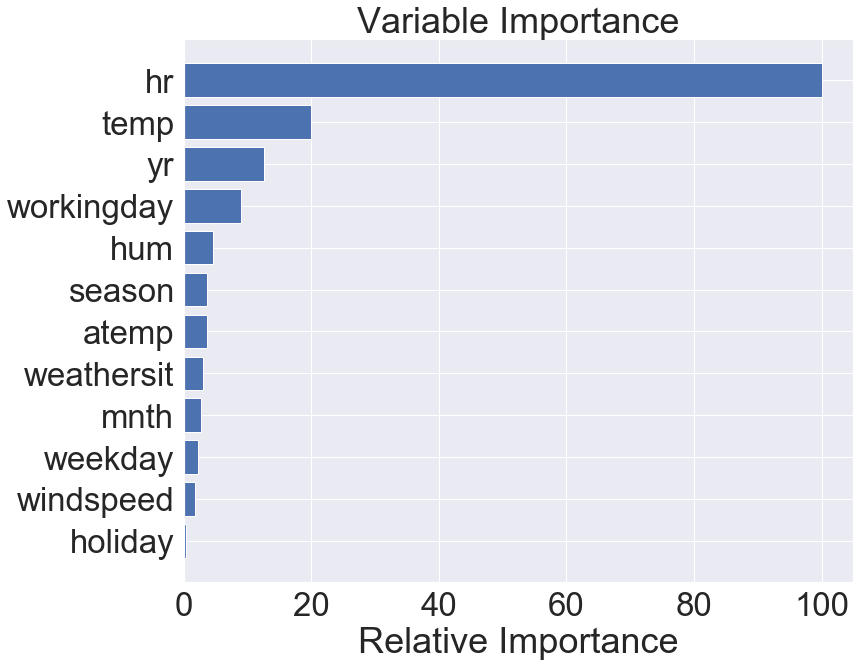

In [163]:
# Relative importance of features 

feature_importance = regressor.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [164]:
ada_regression = AdaBoostRegressor(learning_rate=1, n_estimators=500)
ada_regression.fit(X_train,y_train)
print(ada_regression.score(X_test, y_test))

0.598600179573514


In [175]:
x1_train, x1_test, y1_train, y1_test = train_test_split(reg_data, y, test_size=0.3)

linear_model = LinearRegression()
linear_model.fit(x1_train, y1_train)
result = linear_model.predict(x1_test)

model1_ols = sm.OLS(y, reg_data[reg_data.columns])
model1_metrics = model1_ols.fit()
print(model1_metrics.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     3501.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:59:52   Log-Likelihood:            -1.1077e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17367   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season        19.1869      1.809     10.607      0.0

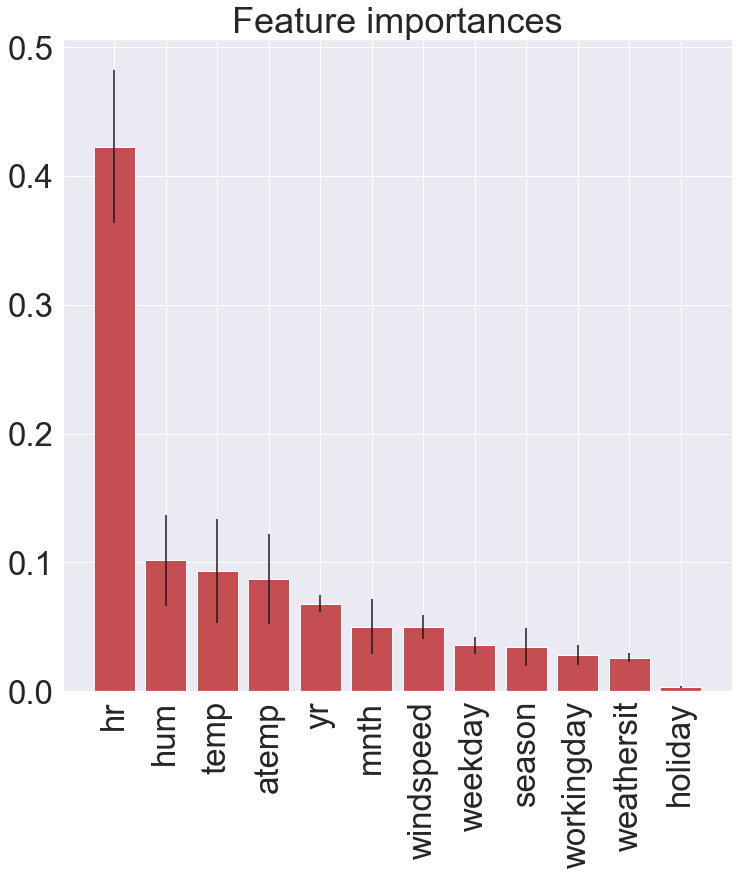

In [176]:
feat_names = x1_train.columns
model2 = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model2.fit(x1_train, y1_train)

## plot the importances ##
importances = model2.feature_importances_
std = np.std([tree.feature_importances_ for tree in model2.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

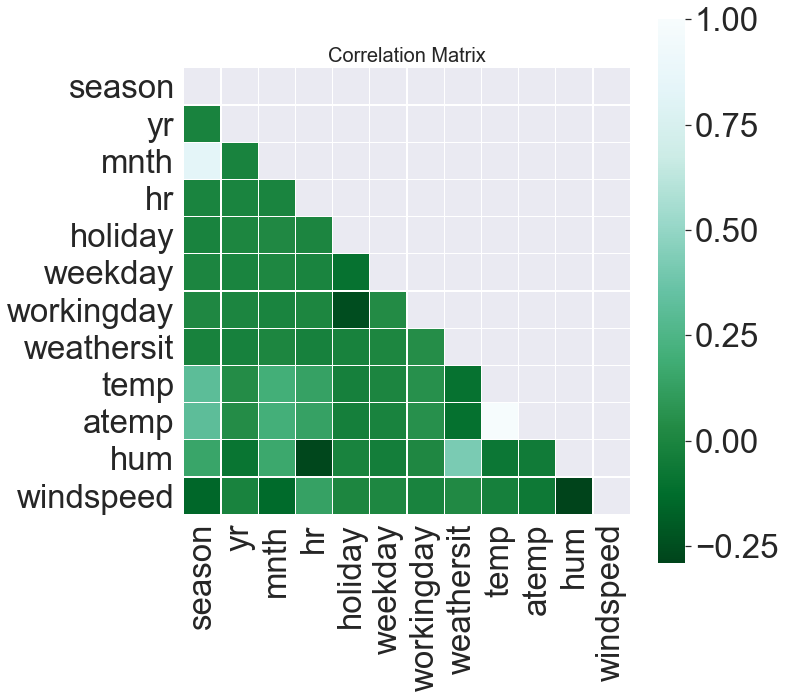

In [177]:
mask = np.zeros_like(reg_data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(10,10))
plt.title('Correlation Matrix',fontsize=20)
sns.set(font_scale=3)
sns.heatmap(reg_data.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="BuGn_r",mask=mask,linecolor='w',cbar={"shrink":.75})